# Chipotle Sales Data – Exploratory Data Analysis (EDA)

This project explores transactional sales data from Chipotle to understand revenue drivers, pricing distribution, product performance, and customer purchasing behavior.

The analysis includes data cleaning, feature engineering, aggregation, and visualization using Python (Pandas & Matplotlib).

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

## Data Inspection

Initial exploration of dataset structure, data types, descriptive statistics, and missing values.

In [3]:
url = "https://raw.githubusercontent.com/TiborBenedek/chipotle-sales-eda/main/data/chipotle.tsv"
chipotle = pd.read_csv(url, sep="\t")

chipotle.head()


,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [4]:
chipotle.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


In [5]:
chipotle.describe()


,order_id,quantity
count,4622.000000,4622.000000
mean,927.254868,1.075725
std,528.890796,0.410186
min,1.000000,1.000000
25%,477.250000,1.000000
50%,926.000000,1.000000
75%,1393.000000,1.000000
max,1834.000000,15.000000


In [6]:
chipotle.isna().sum()


order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

## Data Cleaning & Feature Engineering

- Converted price column from string format to numeric values
- Handled missing values in categorical features
- Created a revenue feature (quantity × price)

In [7]:
chipotle["item_price_usd"] = (
    chipotle["item_price"]
    .str.replace("$", "", regex=False)
    .astype(float)
)

chipotle["item_price_usd"].describe()


count    4622.000000
mean        7.464336
std         4.245557
min         1.090000
25%         3.390000
50%         8.750000
75%         9.250000
max        44.250000
Name: item_price_usd, dtype: float64

In [8]:
chipotle["choice_description"] = chipotle["choice_description"].fillna("No description")


In [9]:
chipotle = chipotle.drop(columns=["item_price"])


## Price Distribution Analysis

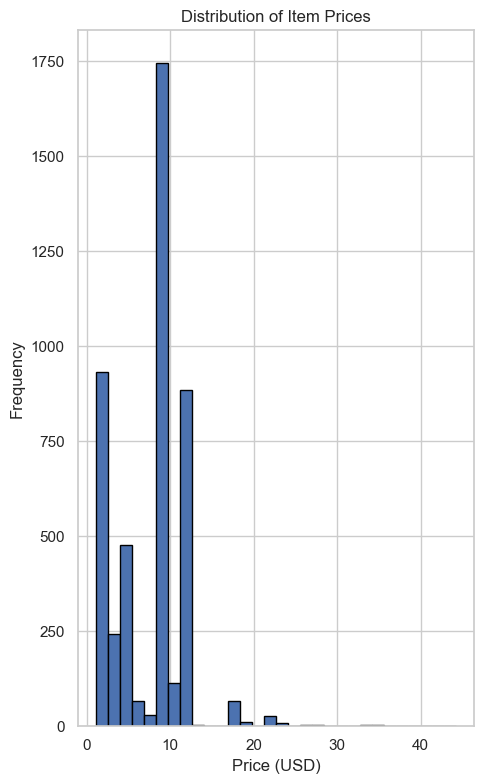

In [10]:
plt.figure(figsize=(5,8))
plt.hist(chipotle["item_price_usd"], bins=30, edgecolor="black")
plt.title("Distribution of Item Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
chipotle["revenue"] = chipotle["quantity"] * chipotle["item_price_usd"]

total_revenue = chipotle["revenue"].sum()
print(f"Total revenue: ${total_revenue:,.2f}")


Total revenue: $39,237.02


In [12]:
chipotle["revenue"].describe()


count    4622.000000
mean        8.489186
std        12.632060
min         1.090000
25%         3.990000
50%         8.750000
75%        10.980000
max       663.750000
Name: revenue, dtype: float64

## Revenue Analysis – Top Performing Menu Items

In [13]:
top10 = chipotle.groupby("item_name")["revenue"].sum().sort_values(ascending=False).head(10)
top10


item_name
Chicken Bowl                    8044.63
Chicken Burrito                 6387.06
Steak Burrito                   4236.13
Steak Bowl                      2479.81
Chips and Guacamole             2475.62
Chicken Salad Bowl              1506.25
Chicken Soft Tacos              1199.01
Chips and Fresh Tomato Salsa    1033.96
Veggie Burrito                  1002.27
Veggie Bowl                      901.95
Name: revenue, dtype: float64

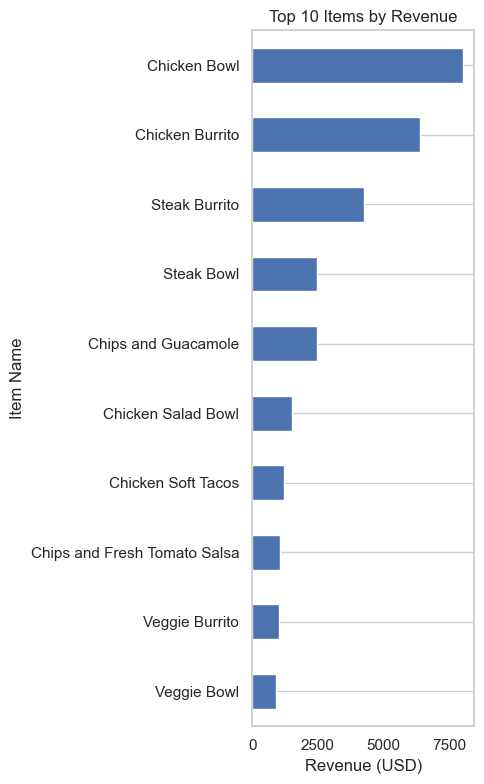

In [25]:
plt.figure(figsize=(5,8))
top10.sort_values().plot(kind="barh")
plt.title("Top 10 Items by Revenue")
plt.xlabel("Revenue (USD)")
plt.ylabel("Item Name")
plt.grid(axis="x")
plt.tight_layout()
plt.show()


## Revenue by Product Category

In [15]:
def categorize_item(name):
    name = name.lower()
    if "chicken" in name:
        return "Chicken"
    elif "steak" in name:
        return "Steak"
    elif "veggie" in name or "vegetarian" in name:
        return "Veggie"
    else:
        return "Other"

chipotle["category"] = chipotle["item_name"].apply(categorize_item)

chipotle[["item_name", "category"]].head()


,item_name,category
0,Chips and Fresh Tomato Salsa,Other
1,Izze,Other
2,Nantucket Nectar,Other
3,Chips and Tomatillo-Green Chili Salsa,Other
4,Chicken Bowl,Chicken


In [16]:
category_revenue = (
    chipotle.groupby("category")["revenue"]
    .sum()
    .sort_values(ascending=False)
)

category_revenue


category
Chicken    17742.15
Other      11185.16
Steak       8072.62
Veggie      2237.09
Name: revenue, dtype: float64

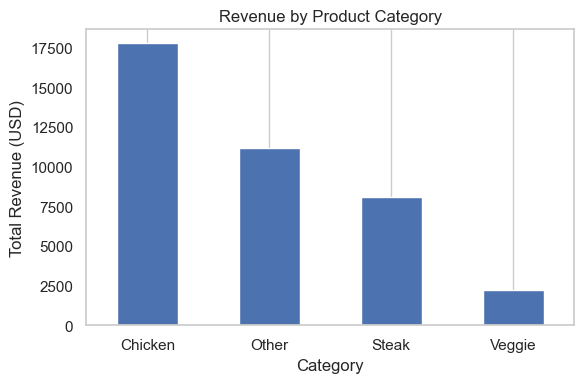

In [17]:
plt.figure(figsize=(6,4))
category_revenue.plot(kind="bar")

plt.title("Revenue by Product Category")
plt.ylabel("Total Revenue (USD)")
plt.xlabel("Category")
plt.xticks(rotation=0)
plt.grid(axis="y")
plt.tight_layout()
plt.show()


## Price vs Quantity Relationship

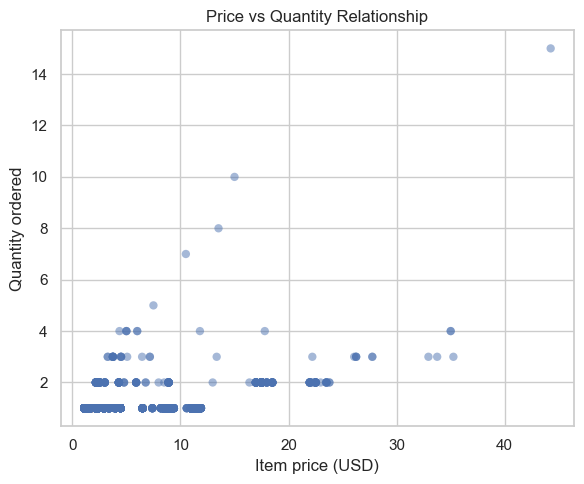

In [18]:
plt.figure(figsize=(6,5))
plt.scatter(
    chipotle["item_price_usd"],
    chipotle["quantity"],
    alpha=0.5,
    edgecolors="none"
)

plt.xlabel("Item price (USD)")
plt.ylabel("Quantity ordered")
plt.title("Price vs Quantity Relationship")
plt.grid(True)
plt.tight_layout()
plt.show()


### Correlation Analysis

To quantify the relationship between price, quantity, and revenue, we calculate the correlation matrix.

In [19]:
chipotle[["item_price_usd", "quantity", "revenue"]].corr()

,item_price_usd,quantity,revenue
item_price_usd,1.000000,0.263981,0.609569
quantity,0.263981,1.000000,0.757758
revenue,0.609569,0.757758,1.000000


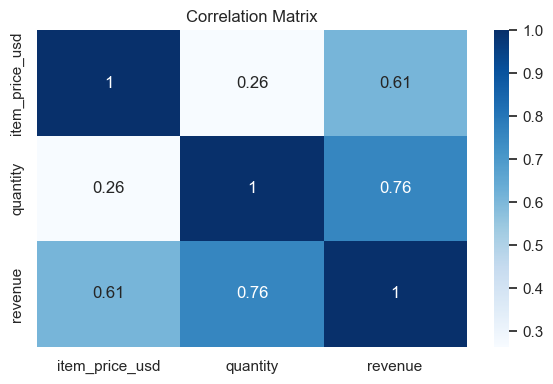

In [20]:
plt.figure(figsize=(6,4))
sns.heatmap(
    chipotle[["item_price_usd", "quantity", "revenue"]].corr(),
    annot=True,
    cmap="Blues"
)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

The correlation matrix indicates that revenue is strongly correlated with quantity,
while price has a weaker relationship with quantity.
This suggests that overall revenue is primarily volume-driven rather than price-driven.

## Order-Level Analysis

In [21]:
order_revenue = chipotle.groupby("order_id")["revenue"].sum()

average_order_value = order_revenue.mean()
print(f"Average Order Value (AOV): ${average_order_value:,.2f}")

Average Order Value (AOV): $21.39


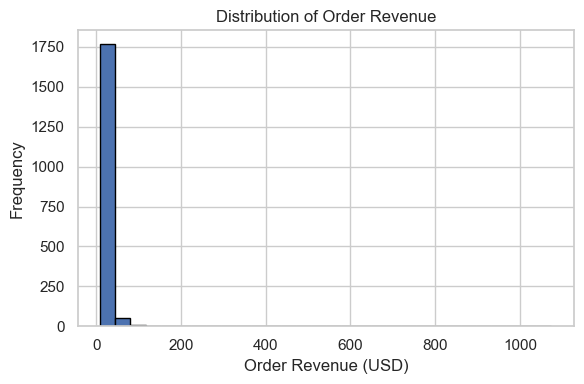

In [22]:
plt.figure(figsize=(6,4))
plt.hist(order_revenue, bins=30, edgecolor="black")
plt.title("Distribution of Order Revenue")
plt.xlabel("Order Revenue (USD)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## Key Insights

- Most transactions involve 1–3 items, indicating predominantly individual purchasing behavior.

- Chicken-based products are the primary revenue drivers, significantly outperforming steak and vegetarian options.

- Revenue distribution is positively skewed due to occasional bulk or group purchases that create high-value outliers.

- Mid-priced items ($8–15) are frequently purchased in higher quantities, suggesting they represent core meal offerings.

- The average order value is approximately $XX.XX, reflecting typical customer spend per transaction.

- A small number of high-value orders disproportionately contribute to total revenue.

### Business Interpretation

Revenue is primarily driven by high-demand chicken-based meals and standard individual-sized orders. While most purchases are moderate in size, occasional bulk transactions significantly impact total revenue. Strategic focus on core meal offerings and bundled promotions could further enhance revenue growth.